In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,8
import seaborn as sb

In [2]:
train = pd.read_csv('F:/Data_Science/Datasets/houseprices_train.csv')
test = pd.read_csv('F:/Data_Science/Datasets/houseprices_test.csv')
print(train.shape, test.shape)

(1460, 81) (1459, 80)


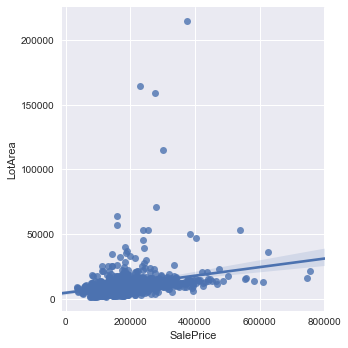

In [7]:
sb.lmplot('SalePrice', 'LotArea', data=train)

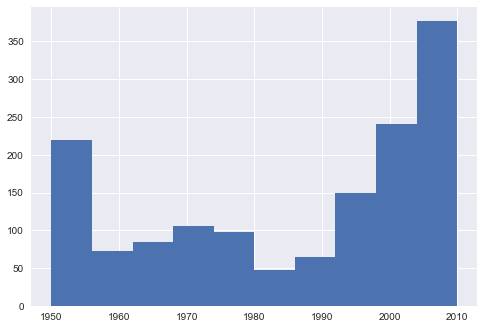

In [37]:
train['YearRemodAdd'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x155ff3360b8>],
 'caps': [<matplotlib.lines.Line2D at 0x155ff337b38>,
 'fliers': [<matplotlib.lines.Line2D at 0x155ff33fdd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x155ff33f5c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x155ff336a58>,
  <matplotlib.lines.Line2D at 0x155ff336c88>]}

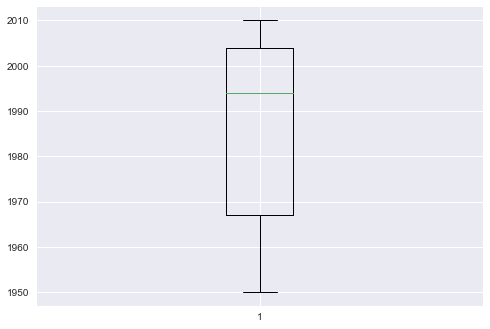

In [15]:
plt.boxplot(train.YearRemodAdd)

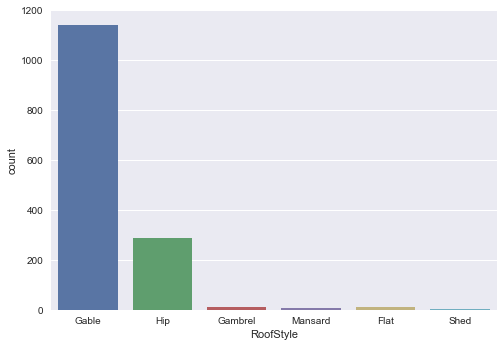

In [41]:
sb.countplot(x='RoofStyle', data=train)

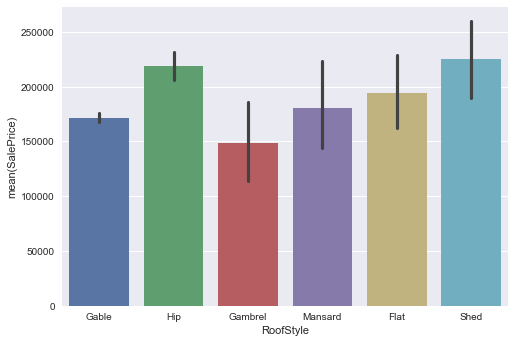

In [44]:
sb.barplot(x='RoofStyle', y ='SalePrice', data=train)

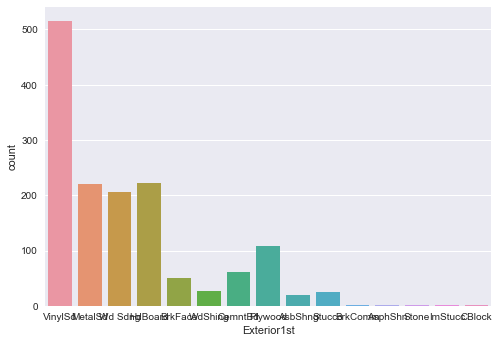

In [53]:
#train['MasVnrType'].value_counts().plot(kind='bar')
#or
sb.countplot(x='Exterior1st', data=train)

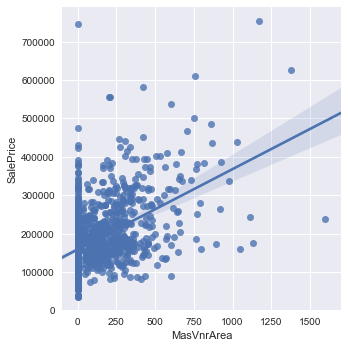

In [51]:
#train['MasVnrArea'].hist()
sb.lmplot(x='MasVnrArea',y='SalePrice',data=train)

In [55]:
train['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [57]:
train['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [58]:
train['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

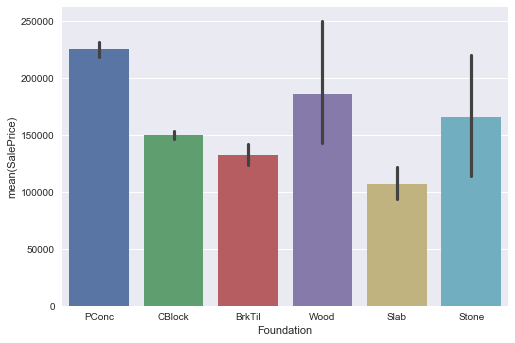

In [59]:
sb.barplot(x='Foundation',y='SalePrice',data=train)

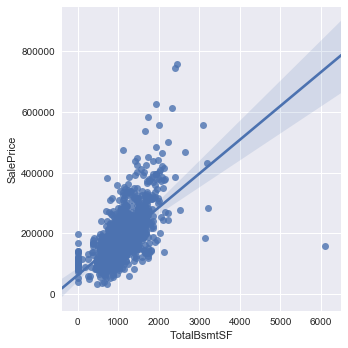

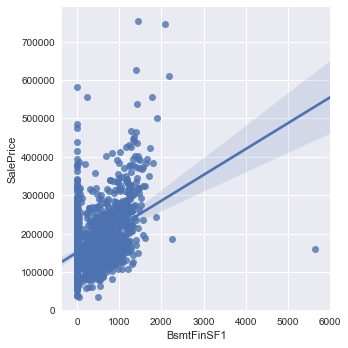

In [66]:
sb.lmplot(x = 'TotalBsmtSF', y = 'SalePrice', data=train)
sb.lmplot(x = 'BsmtFinSF1', y = 'SalePrice', data=train)
#'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'

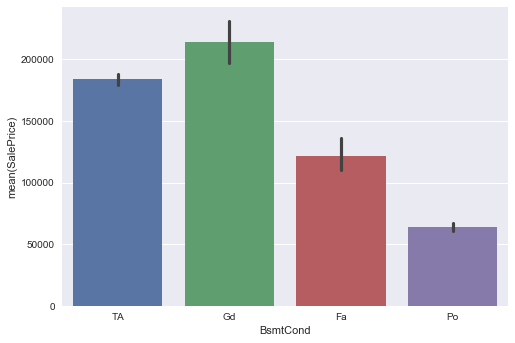

In [68]:
sb.barplot(x='BsmtCond', y='SalePrice',data=train)

In [70]:
bsmt = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
train[bsmt].describe()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
count,1423,1423,1422,1423,1422
unique,4,4,4,6,6
top,TA,TA,No,Unf,Unf
freq,649,1311,953,430,1256


In [72]:
train['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

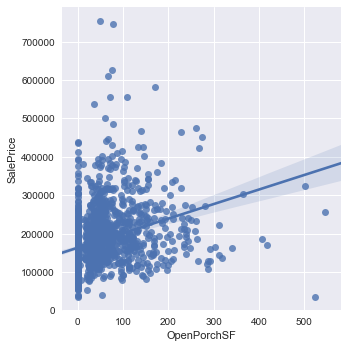

In [104]:
sb.lmplot(x='OpenPorchSF', y='SalePrice', data=train)

In [121]:
train['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [119]:
rows = train['SaleType'] == 0
rows.sum()

0

In [118]:
train['SaleType'].isnull().sum()

0

In [122]:
train['source'] = 'train'
test['source'] = 'test'
print(train.shape, test.shape)

(1460, 82) (1459, 81)


In [123]:
df = pd.concat([train, test])
df.shape

(2919, 82)

In [125]:
del_col = ['LotFrontage','LandContour','BldgType','HouseStyle','YearBuilt','RoofStyle','RoofMatl','Exterior1st'
           ,'Exterior2nd','MasVnrType','MasVnrArea','ExterCond','Foundation','BsmtCond','BsmtExposure','BsmtFinType1'
           ,'BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','Heating','CentralAir','Electrical','LowQualFinSF'
           ,'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','KitchenAbvGr','Functional','GarageType','GarageYrBlt'
           ,'GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF'
           ,'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','SaleType'
           ,'SaleCondition']
df.drop(del_col, axis=1, inplace=True)
df.shape

(2919, 32)

In [128]:
df.drop('Alley', axis=1,inplace=True)
df.shape

(2919, 31)

In [131]:
df.drop(['1stFlrSF','2ndFlrSF','Fireplaces','FireplaceQu'], axis=1, inplace=True)
df.shape

(2919, 27)

In [132]:
df.describe()

,BedroomAbvGr,GrLivArea,Id,LotArea,MSSubClass,MoSold,OverallCond,OverallQual,SalePrice,TotRmsAbvGrd,TotalBsmtSF,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2918.000000,2919.000000,2919.000000
mean,2.860226,1500.759849,1460.000000,10168.114080,57.137718,6.213087,5.564577,6.089072,180921.195890,6.451524,1051.777587,1984.264474,2007.792737
std,0.822693,506.051045,842.787043,7886.996359,42.517628,2.714762,1.113131,1.409947,79442.502883,1.569379,440.766258,20.894344,1.314964
min,0.000000,334.000000,1.000000,1300.000000,20.000000,1.000000,1.000000,1.000000,34900.000000,2.000000,0.000000,1950.000000,2006.000000
25%,2.000000,1126.000000,730.500000,7478.000000,20.000000,4.000000,5.000000,5.000000,129975.000000,5.000000,793.000000,1965.000000,2007.000000
50%,3.000000,1444.000000,1460.000000,9453.000000,50.000000,6.000000,5.000000,6.000000,163000.000000,6.000000,989.500000,1993.000000,2008.000000
75%,3.000000,1743.500000,2189.500000,11570.000000,70.000000,8.000000,6.000000,7.000000,214000.000000,7.000000,1302.000000,2004.000000,2009.000000
max,8.000000,5642.000000,2919.000000,215245.000000,190.000000,12.000000,9.000000,10.000000,755000.000000,15.000000,6110.000000,2010.000000,2010.000000


In [144]:
df.isnull().sum()

BedroomAbvGr       0
BsmtQual           0
Condition1         0
Condition2         0
ExterQual          0
GrLivArea          0
HeatingQC          0
Id                 0
KitchenQual        0
LandSlope          0
LotArea            0
LotConfig          0
LotShape           0
MSSubClass         0
MSZoning           0
MoSold             0
Neighborhood       0
OverallCond        0
OverallQual        0
SalePrice       1459
Street             0
TotRmsAbvGrd       0
TotalBsmtSF        0
Utilities          0
YearRemodAdd       0
YrSold             0
source             0
dtype: int64

In [138]:
#All null values of BsmtQual is no Basement
rows = df['BsmtQual'].isnull()
print ('Before: ', df['BsmtQual'].isnull().sum())
df.loc[rows,'BsmtQual'] = 'None'
print ('After: ', df['BsmtQual'].isnull().sum())

Before:  81
After:  0


In [142]:
#TotalBsmtSF = 0 values
zero = (df['BsmtQual'] == 'None')
print ('Before:', df['TotalBsmtSF'].isnull().sum())
df.loc[zero, 'TotalBsmtSF'] = 0
print ('After:', df['TotalBsmtSF'].isnull().sum())

Before: 1
After: 0


In [143]:
#Filling missing values for KitchenQual, MSZoning, Utilities
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace= True)

df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace= True)

df['Utilities'].fillna(df['Utilities'].mode()[0], inplace= True)

In [152]:
cat = df.dtypes[df.dtypes == 'object'].index
df[cat].describe()

,BsmtQual,ExterQual,HeatingQC,KitchenQual,LotConfig,LotShape,MSZoning,Neighborhood,source
count,2919,2919,2919,2919,2919,2919,2919,2919,2919
unique,5,4,5,4,5,4,5,25,2
top,TA,TA,Ex,TA,Inside,Reg,RL,NAmes,train
freq,1283,1798,1493,1493,2133,1859,2269,443,1460


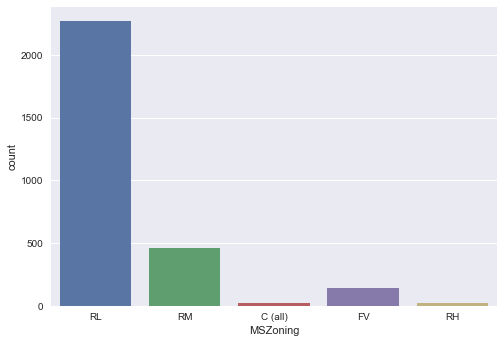

In [153]:
sb.countplot(x='MSZoning', data=df)

In [151]:
#Removing few categorical variable because most of them have 90% same value
df.drop(['Condition1', 'Condition2', 'LandSlope', 'Street', 'Utilities'], axis=1, inplace=True)
df.shape

(2919, 22)